## Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import itertools
import seaborn as sns

## Originial Dataset

In [2]:
# Read Dataset
DATA_PATH = '/Users/jupternguyen/Projects/COS40007/water_potability.csv'
water_df = pd.read_csv(DATA_PATH)

In [3]:
# Rename
water_df.rename(columns={'ph': 'pH', 'Organic_carbon': 'Organic_Carbon'}, inplace=True)

# Check columns
water_df.columns

Index(['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_Carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
# Describe
water_df.describe()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
print("Before handling missing:\n", water_df.isna().sum().sum())

water_df.dropna(how='any', inplace=True)

print("--------------------")
print("After handling missing:\n", imputed_df.isna().sum().sum())

Before handling missing:
 1434
--------------------


NameError: name 'imputed_df' is not defined

In [2086]:
# Exclude the target column 'Potability' from the outlier treatment
features = water_df.columns.drop('Potability')

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the selected features
Q1 = water_df[features].quantile(0.25)
Q3 = water_df[features].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries for the features
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers in each feature with their respective bounds
for column in features:
    # Replace values greater than the upper bound with the upper bound
    water_df[column] = np.where(water_df[column] > upper_bound[column],
                                           upper_bound[column], water_df[column])

    # Replace values lower than the lower bound with the lower bound
    water_df[column] = np.where(water_df[column] < lower_bound[column],
                                           lower_bound[column], water_df[column])

water_df.to_csv('converted_water.csv', index=False)

In [2087]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pH               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_Carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


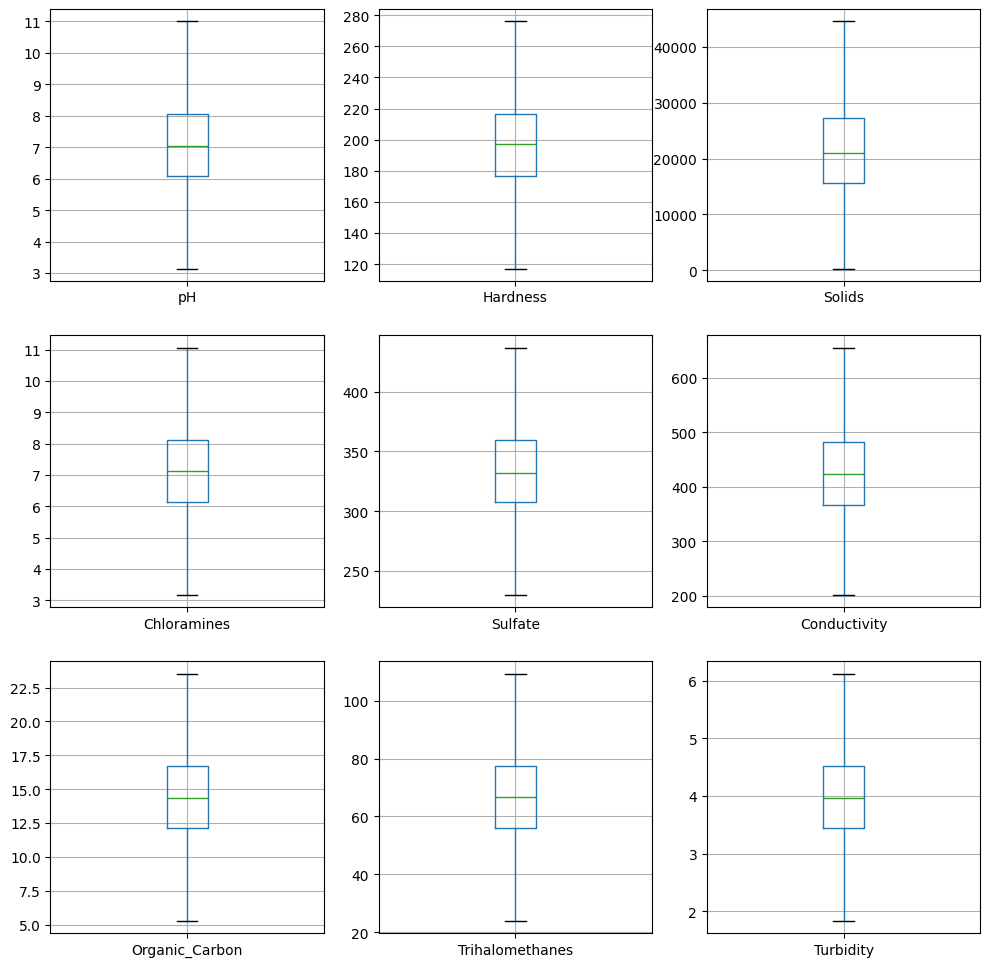

In [2088]:
# Plotting the boxplots in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Defining the columns to plot
columns_to_plot = ['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                   'Organic_Carbon', 'Trihalomethanes', 'Turbidity']


for ax, column in zip(axes.flatten(), columns_to_plot):
    water_df.boxplot(column=[column], ax=ax)

plt.show()

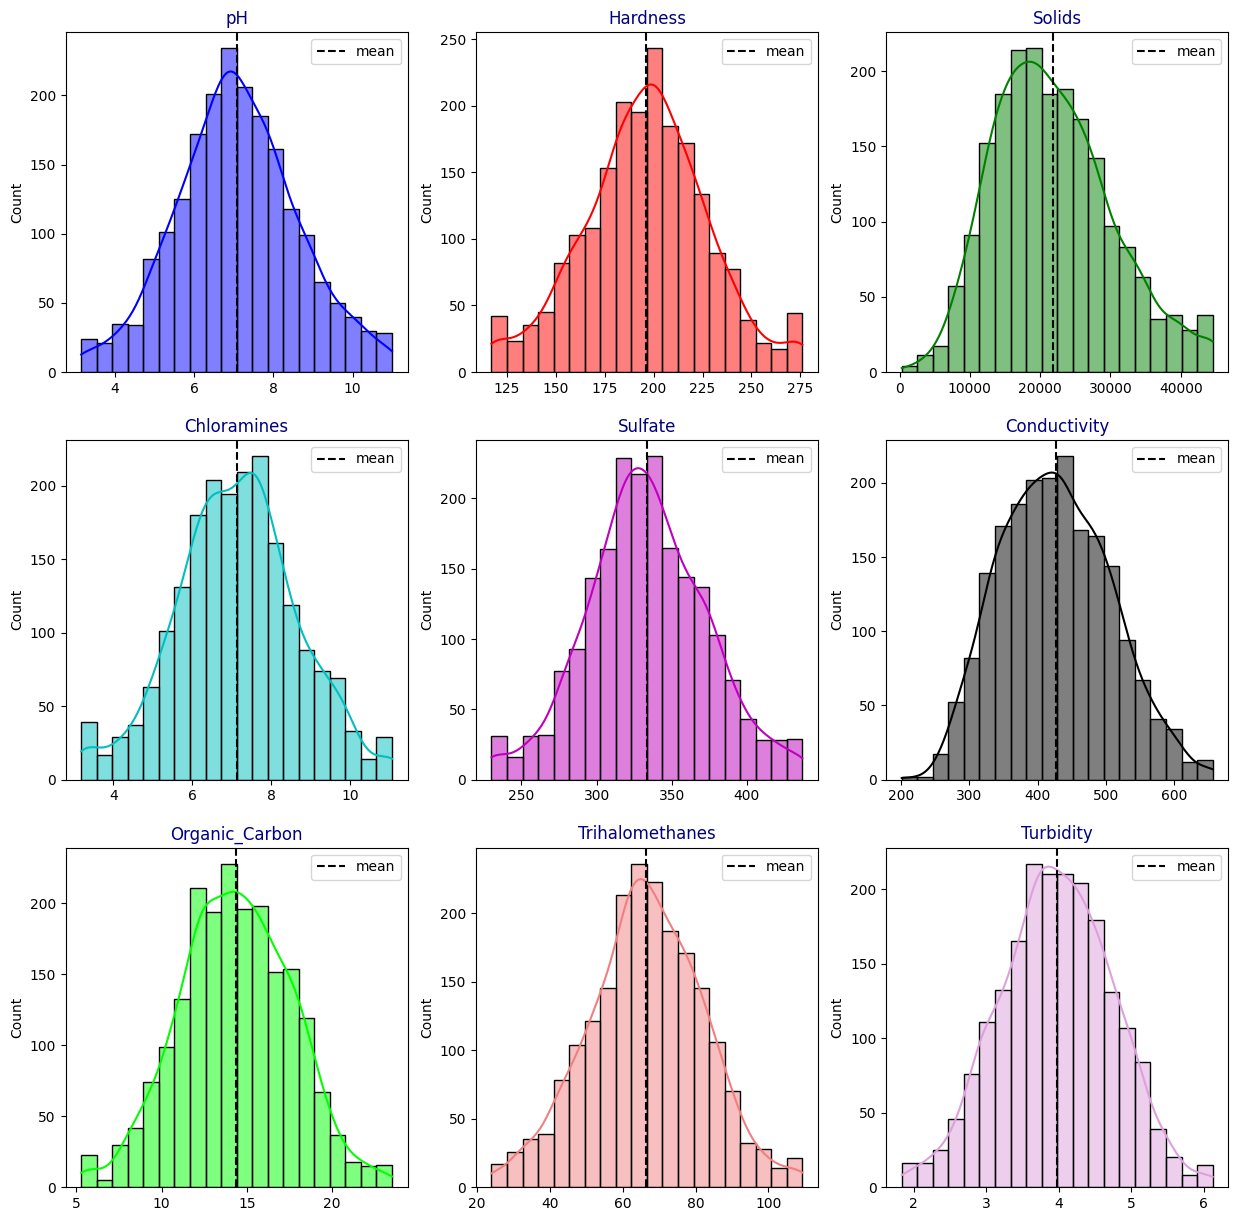

In [2089]:
cols = [i for i in water_df.columns if i != 'Potability']
length = len(cols)
cs = ["b", "r", "g", "c", "m", "k", "lime", "lightcoral", "plum"]  # Ensure enough colors for your columns
fig = plt.figure(figsize=(15, 15))  # Adjusted figure size to accommodate 3x3 grid

rows, cols_per_row = 3, 3  # Define the grid size
num_plots = rows * cols_per_row

for i, (col, color) in enumerate(zip(cols, cs)):
    plt.subplot(rows, cols_per_row, i + 1)  # Correct subplot indexing
    sns.histplot(water_df[col], color=color, kde=True, bins=20)  # Using histplot instead of distplot
    plt.axvline(water_df[col].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(col, color="navy")
    plt.xlabel("")

plt.show()

Potability
0    1200
1     811
Name: count, dtype: int64


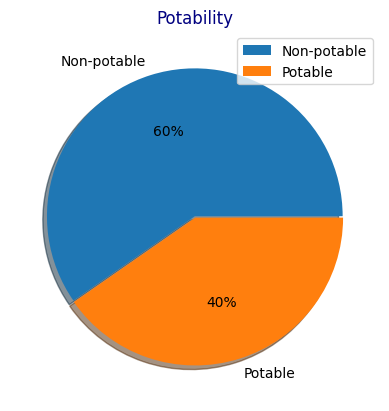

In [2090]:
target = water_df['Potability'].value_counts()
print(target)

plt.pie(target, labels=['Non-potable', 'Potable'], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend(loc='best')
plt.title('Potability', color="navy")
plt.xlabel("")

plt.show()

In [2091]:
water_df.corr()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity,Potability
pH,1.000000,0.114481,-0.088930,-0.029831,0.011037,0.013825,0.025224,0.016636,-0.034174,0.017873
Hardness,0.114481,1.000000,-0.050965,-0.022898,-0.105092,0.011573,0.012793,-0.016693,-0.036554,0.001312
Solids,-0.088930,-0.050965,1.000000,-0.052275,-0.153003,-0.006093,-0.003798,-0.017519,0.021253,0.038995
Chloramines,-0.029831,-0.022898,-0.052275,1.000000,0.015692,-0.029401,-0.020838,0.012128,0.012040,0.019211
Sulfate,0.011037,-0.105092,-0.153003,0.015692,1.000000,-0.014049,0.022624,-0.022721,-0.007596,-0.012533
Conductivity,0.013825,0.011573,-0.006093,-0.029401,-0.014049,1.000000,0.015376,0.004815,0.012736,-0.014993
Organic_Carbon,0.025224,0.012793,-0.003798,-0.020838,0.022624,0.015376,1.000000,-0.005092,-0.015858,-0.014780
Trihalomethanes,0.016636,-0.016693,-0.017519,0.012128,-0.022721,0.004815,-0.005092,1.000000,-0.020751,0.008967
Turbidity,-0.034174,-0.036554,0.021253,0.012040,-0.007596,0.012736,-0.015858,-0.020751,1.000000,0.022218
Potability,0.017873,0.001312,0.038995,0.019211,-0.012533,-0.014993,-0.014780,0.008967,0.022218,1.000000


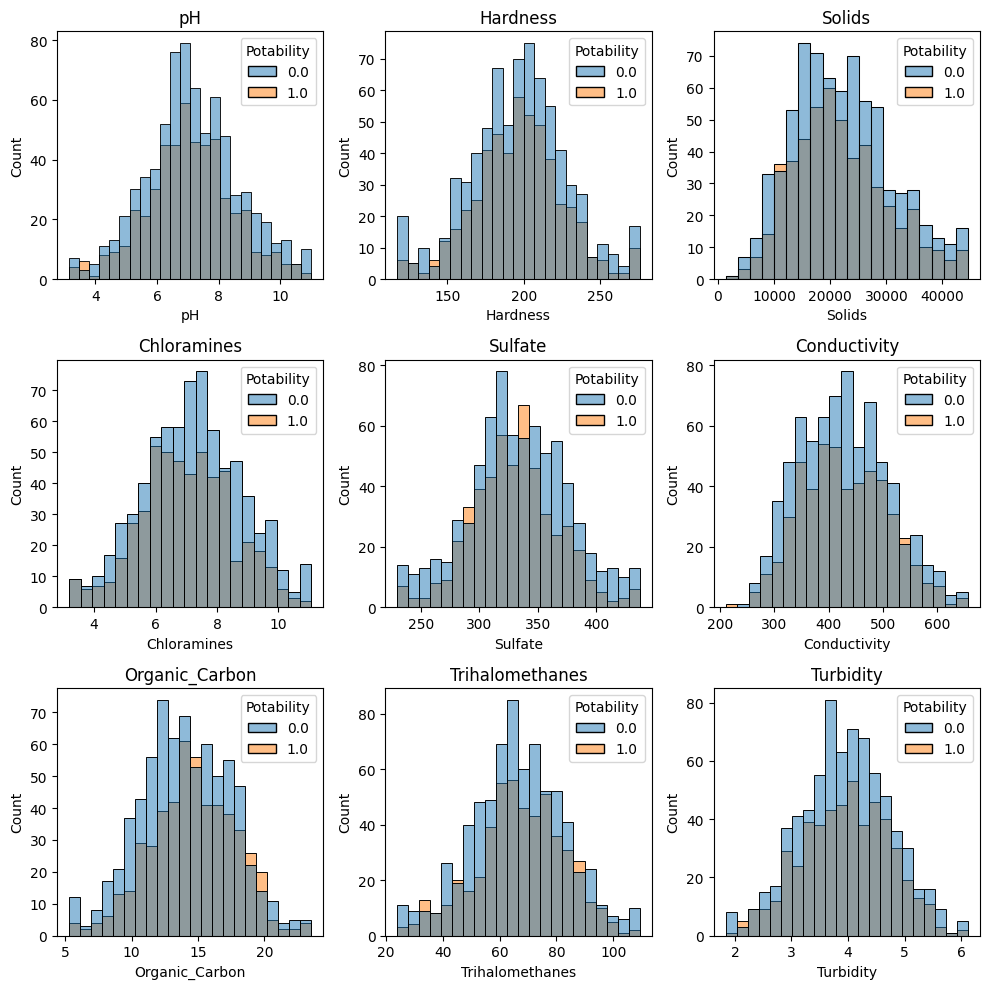

In [2092]:
fig = plt.figure(figsize=(10,10))

for i in range(len(columns_to_plot)):
    plt.subplot(3,3,i+1)
    plt.title(columns_to_plot[i])
    sns.histplot(data=df,x=water_df[columns_to_plot[i]],hue='Potability')
plt.tight_layout()
plt.show()

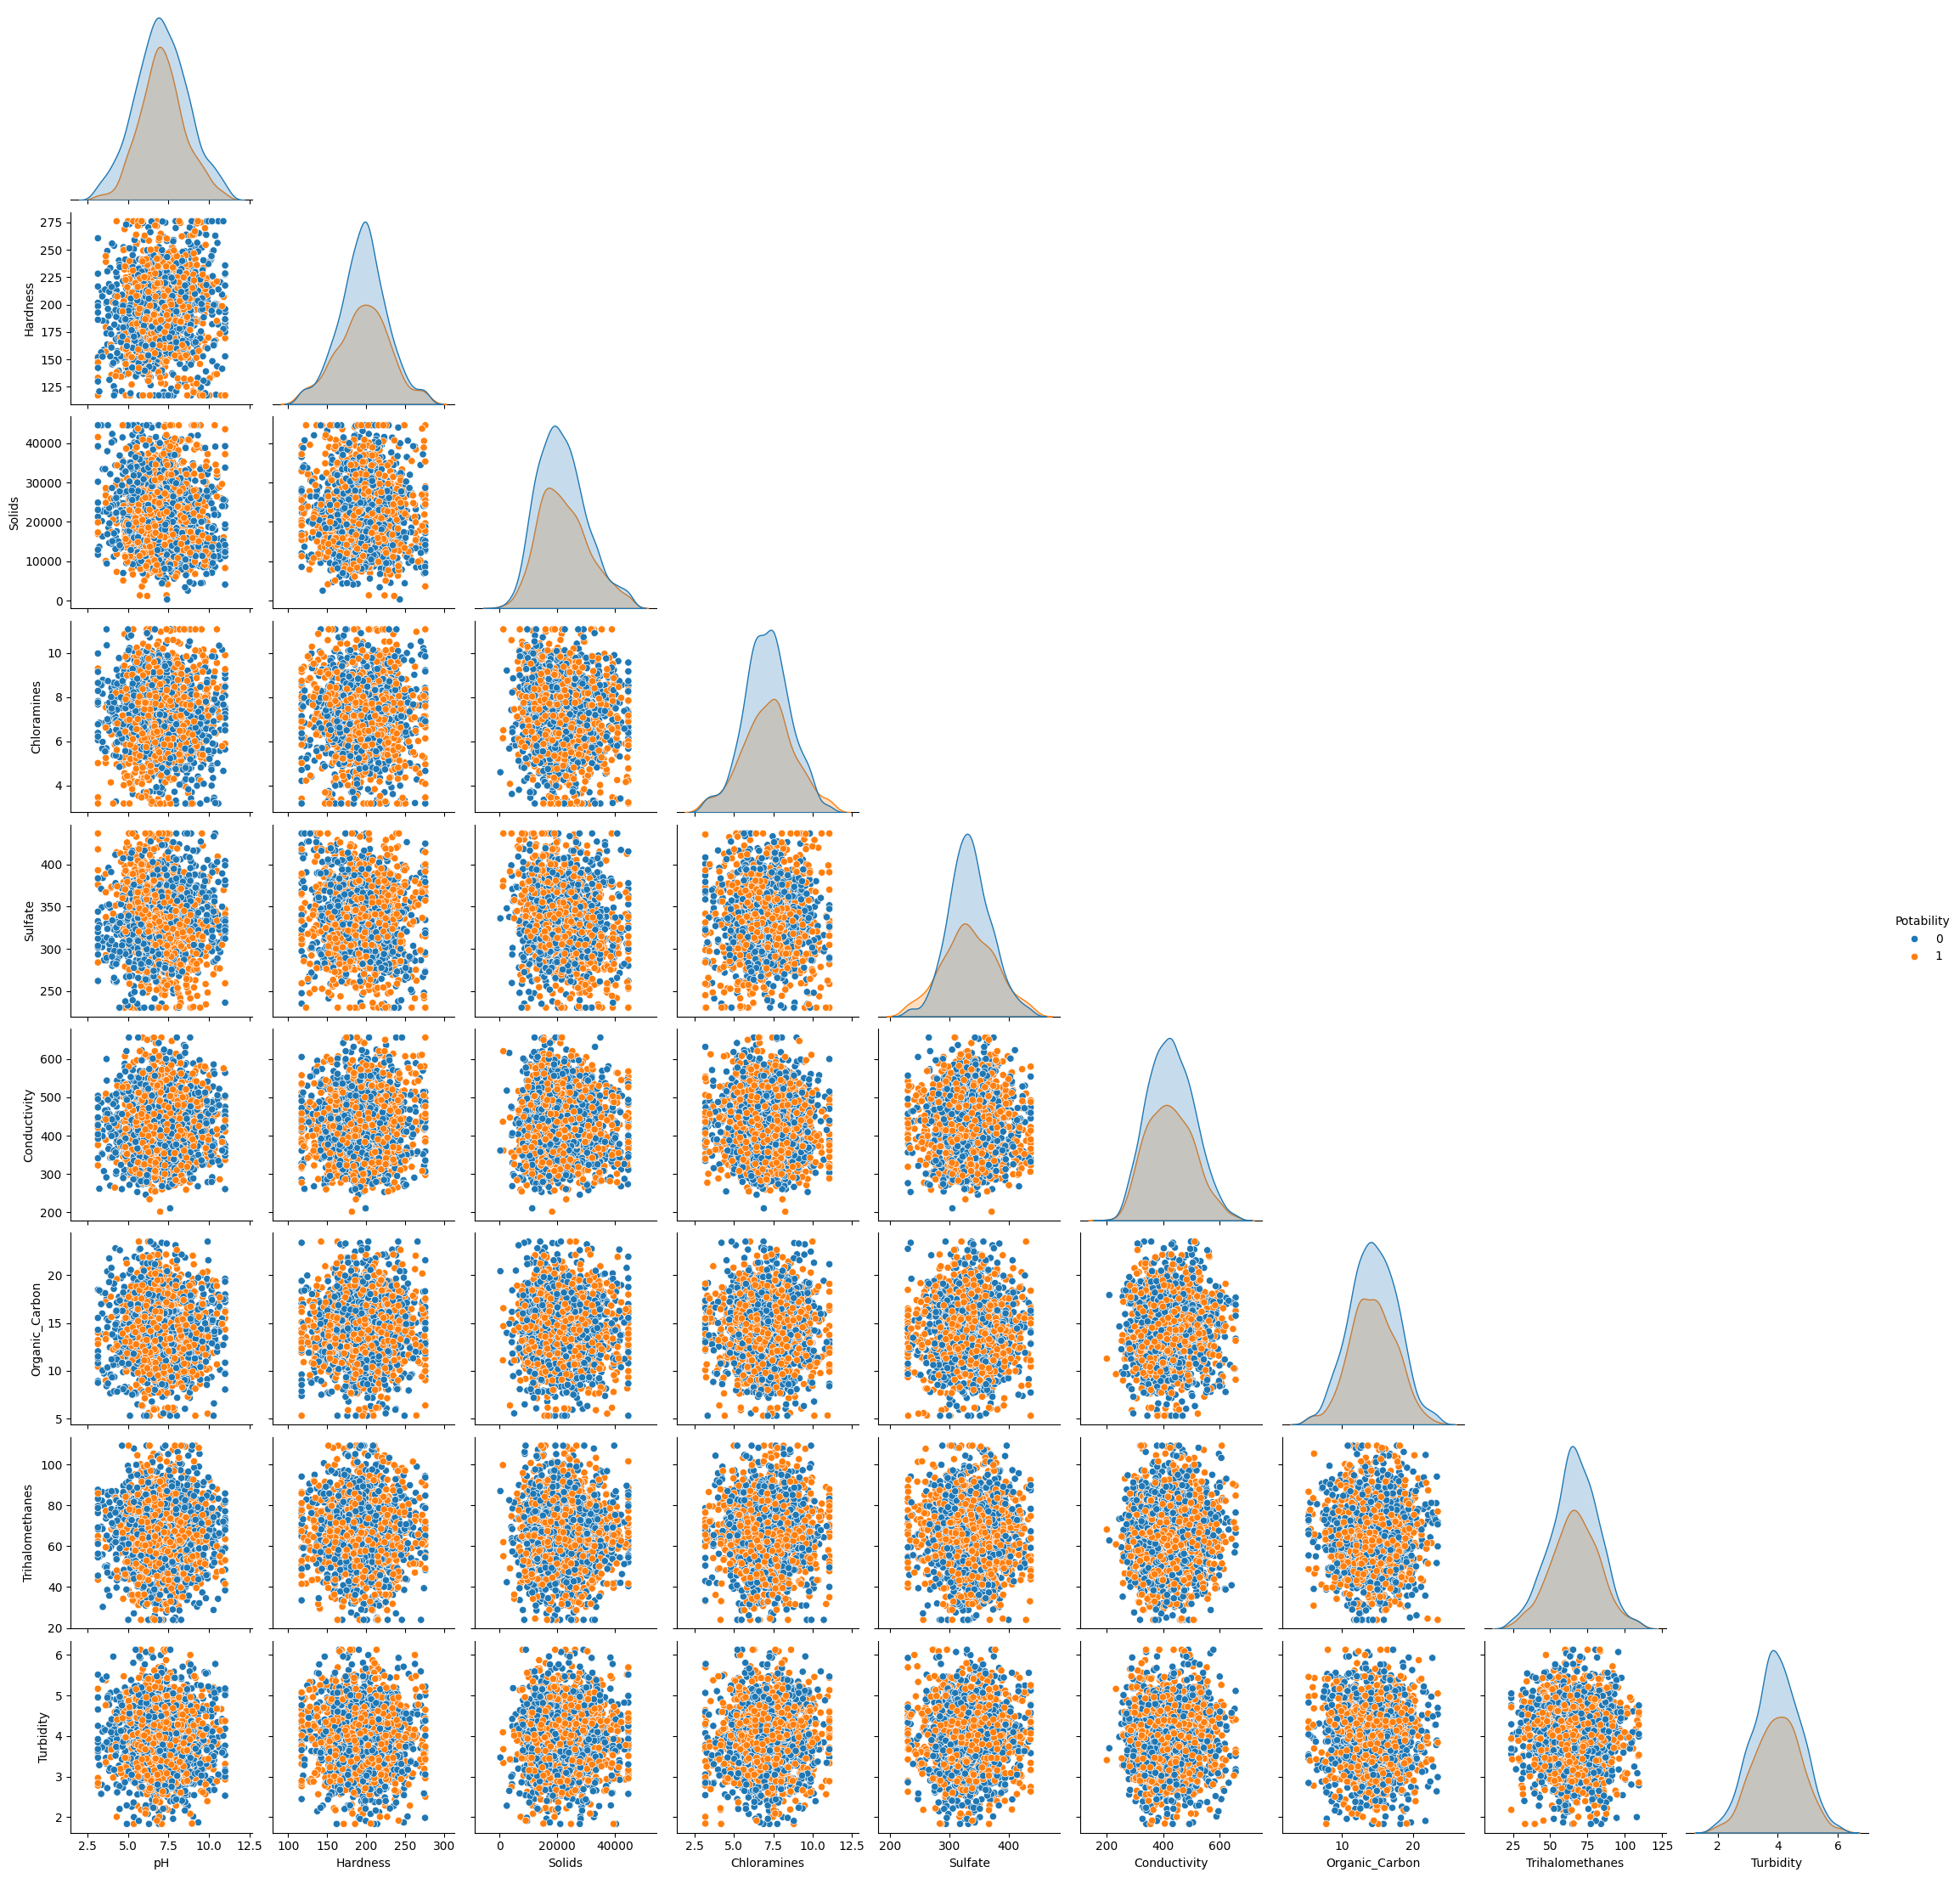

In [2093]:
sns.pairplot(water_df, diag_kind='kde', hue='Potability', corner=True)
plt.show()

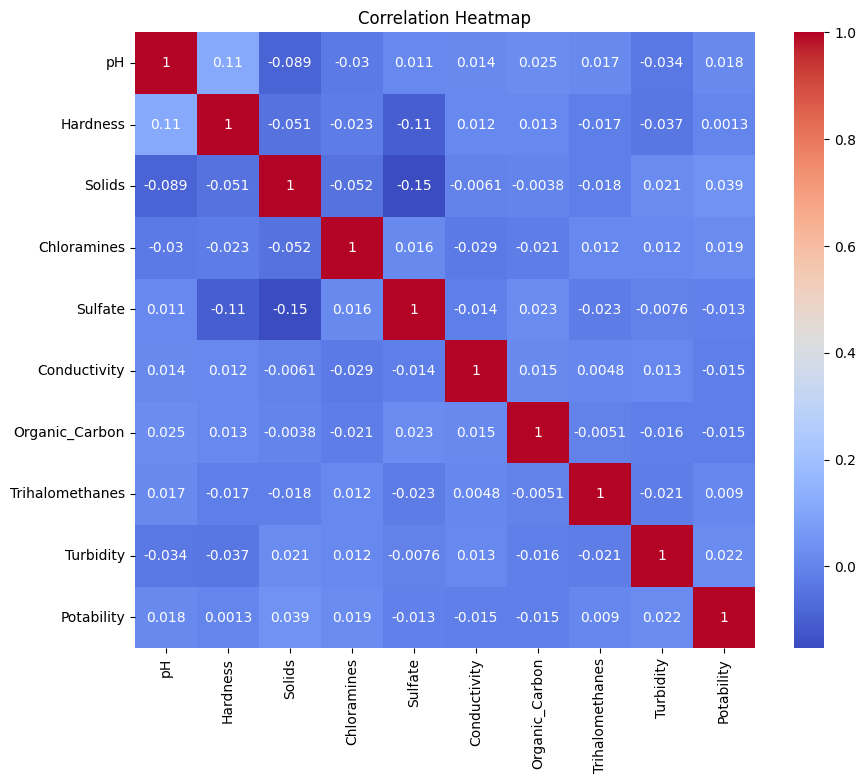

In [2094]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(water_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [2095]:
water_df.describe()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.086981,196.055749,21868.637825,7.131934,333.347354,426.418770,14.358055,66.407119,3.969582,0.403282
std,1.533698,31.899336,8493.143737,1.545770,40.067552,80.362231,3.307772,15.900017,0.776245,0.490678
min,3.144855,117.200740,320.942611,3.182649,230.085447,201.619737,5.285688,23.943772,1.836026,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,10.997837,275.985268,44532.969581,11.065972,436.877619,655.912460,23.521466,109.300818,6.121065,1.000000


In [2096]:
# Define safe ranges for each feature
safe_ranges = {
    'pH': (6.5, 8.5),
    'Hardness': (10, 500),  # mg/L
    'Solids': (0, 1200),  # mg/L
    'Chloramines': (0.3, 5),  # mg/L
    'Sulfate': (0, 600),  # mg/L
    'Conductivity': (0, 1660),  # μS/cm
    'Organic_Carbon': (0, 4),  # mg/L
    'Trihalomethanes': (0, 100),  # μg/L
    'Turbidity': (0, 5)  # NTU
}

# Filter rows where Potability is 1 (water labeled as potable)
potable_rows = water_df[water_df['Potability'] == 1]
# Filter rows where Potability is 0 (water labeled as non-potable)
non_potable_rows = water_df[water_df['Potability'] == 0]

# Create a mask for rows with wrong Potability label for potable samples
potable_conditions = [(potable_rows[col] < safe_ranges[col][0]) | (potable_rows[col] > safe_ranges[col][1]) for col in safe_ranges]

# Create a mask for rows with wrong Potability label for non-potable samples
non_potable_conditions = [(non_potable_rows[col] > safe_ranges[col][0]) & (non_potable_rows[col] < safe_ranges[col][1]) for col in safe_ranges]

# Combine all conditions using logical OR for potable and AND for non-potable
wrong_potable_condition = pd.concat(potable_conditions, axis=1).any(axis=1)
wrong_non_potable_condition = pd.concat(non_potable_conditions, axis=1).all(axis=1)

# Get the indices of rows with wrong potability labels
wrong_potable_indices = potable_rows[wrong_potable_condition].index
wrong_non_potable_indices = non_potable_rows[wrong_non_potable_condition].index

# Output the indices of rows with wrong labels
wrong_potable_indices = list(wrong_potable_indices)
print("Number of potential wrong potable-label based on Ground-truth:", len(wrong_potable_indices))

wrong_non_potable_indices = list(wrong_non_potable_indices)
print("Number of potential wrong non-potable-label based on Ground-truth:", len(wrong_non_potable_indices))


Number of potential wrong potable-label based on Ground-truth: 811
Number of potential wrong non-potable-label based on Ground-truth: 0


## New Dataset

In [2097]:
df = pd.read_csv('converted_water.csv')

In [2098]:
# Define the binning criteria for continuous features based on domain knowledge
bins_pH = [3, 6, 7, 8, 11]
labels_pH = ['Low', 'Best', 'Moderate', 'Risky']

# Apply binning and encode to numerical values
df['pH_binned'] = pd.cut(df['pH'], bins=bins_pH, labels=labels_pH, include_lowest=True)
df['pH_binned'] = df['pH_binned'].astype('category').cat.codes

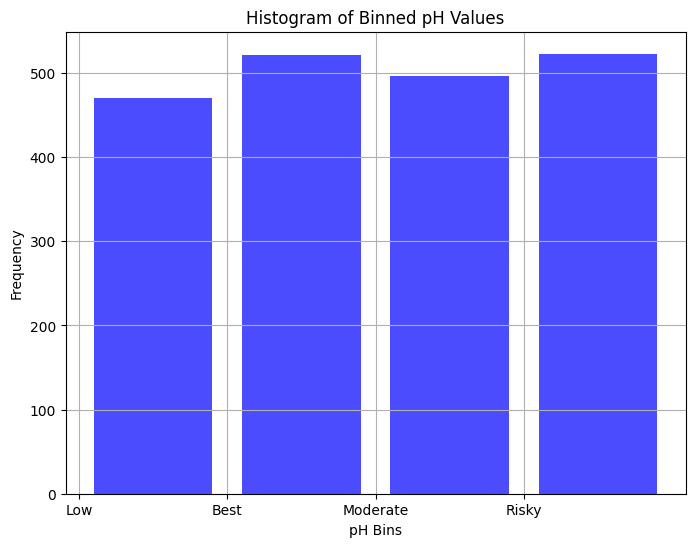

In [2099]:
# Plot histogram for the binned pH values (use number of bins corresponding to the unique binned values)
plt.figure(figsize=(8, 6))
plt.hist(df['pH_binned'], bins=range(5), rwidth=0.8, color='blue', alpha=0.7)  # 4 bins for 4 categories
plt.xticks([0, 1, 2, 3], labels_pH)  # Match the bins to the labels
plt.title('Histogram of Binned pH Values')
plt.xlabel('pH Bins')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

In [2100]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Select only float64 columns to scale, excluding 'Potability' or other categorical columns
float_cols = df.select_dtypes(include=['float64']).columns
float_cols = float_cols.drop('Potability', errors='ignore')  # Ensure 'Potability' is excluded if present

# Apply MinMax Scaling to the float columns
df[float_cols] = scaler.fit_transform(df[float_cols])

print(df.columns)

# Check if 'pH' column exists before dropping to avoid an error
if 'pH' in df.columns:
    df = df.drop('pH', axis=1)

df = df[[col for col in df.columns if col != 'Potability'] + ['Potability']]

# Save the dataframe to a CSV file
df.to_csv('normalized_water.csv', index=False)
print('Done, the new dataset has been saved.')

Index(['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_Carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'pH_binned'],
      dtype='object')
Done, the new dataset has been saved.


In [2101]:
# Calculate covariance between pairs of features and create new features
df['Solids_Sulfate'] = df['Solids'].cov(df['Sulfate'])
df['Sulfate_Hardness'] = df['Hardness'].cov(df['Sulfate'])
df['Solids_Organic_Carbon'] = df['Solids'].cov(df['Organic_Carbon'])

# Reorder the columns to ensure 'Potability' is at the end
df = df[[col for col in df.columns if col != 'Potability'] + ['Potability']]

# Save the updated dataframe to a new CSV file
df.to_csv('features_water.csv', index=False)

print('New features created and saved to "features_water.csv".')


New features created and saved to "features_water.csv".


In [2102]:
# List of columns to eliminate
columns_to_drop = ['Trihalomethanes', 'Organic_Carbon']

# Drop the specified columns from the dataframe
df = df.drop(columns=columns_to_drop, axis=1)

# Save the updated dataframe to a new CSV file
df.to_csv('selected_feature_water.csv', index=False)

print('Selected columns removed. The updated dataset has been saved to "selected_feature_water.csv".')

Selected columns removed. The updated dataset has been saved to "selected_feature_water.csv".


In [2103]:
df = pd.read_csv('converted_water.csv')

# List of columns to eliminate
columns_to_drop = ['Trihalomethanes', 'Conductivity']

# Drop the specified columns from the dataframe
df = df.drop(columns=columns_to_drop, axis=1)

# Save the updated dataframe to a new CSV file
df.to_csv('selected_converted_water.csv', index=False)

print('Selected columns removed. The updated dataset has been saved to "selected_converted_water.csv".')

Selected columns removed. The updated dataset has been saved to "selected_converted_water.csv".


## Training

In [2104]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# List of datasets (replace these paths with the actual paths to your datasets)
dataset_paths = ['converted_water.csv', 'normalized_water.csv', 'features_water.csv', 'selected_feature_water.csv', 'selected_converted_water.csv']

# Initialize an empty list to store results
results = []

# Loop through each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Define features (X) and target (y)
    X = df.drop('Potability', axis=1)  # Features
    y = df['Potability']  # Target

    # Split the dataset into 70% training and 30% validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

    # Initialize and train a Decision Tree model
    decision_tree_model = DecisionTreeClassifier(random_state=1)
    decision_tree_model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = decision_tree_model.predict(X_val)

    # Evaluate the model
    # Precision
    precision = precision_score(y_val, y_pred)

    # Recall
    recall = recall_score(y_val, y_pred)

    # F1-Score
    f1 = f1_score(y_val, y_pred)

    # Append the results into a list as a dictionary
    results.append({
        'Dataset': dataset_path,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('results_water.csv', index=False)

print('Model evaluation results saved to "results_water.csv".')


Model evaluation results saved to "results_water.csv".


In [2105]:
# Load the results dataset (Replace the file path with the correct location of your CSV file)
df_results = pd.read_csv('results_water.csv')

# Extract the relevant metrics
datasets = df_results['Dataset']
precision = df_results['Precision']
recall = df_results['Recall']
f1 = df_results['F1 Score']


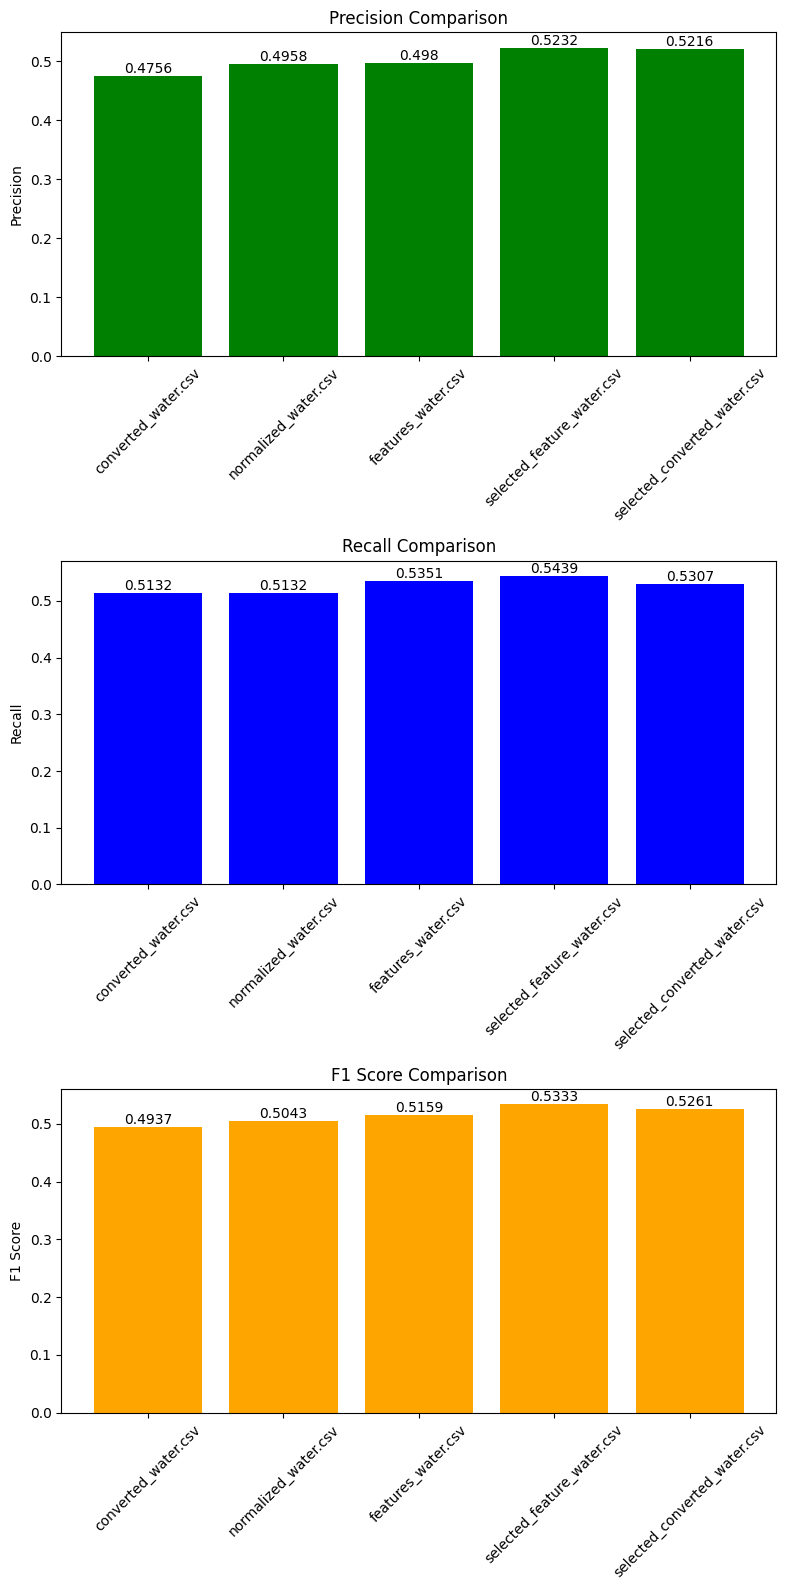

In [2106]:
# Plot comparison of Precision, Recall, and F1 Score
plt.figure(figsize=(8, 16))

# Plot Precision
plt.subplot(3, 1, 1)
bars = plt.bar(datasets, precision, color='green')
plt.title('Precision Comparison')
plt.xticks(rotation=45)
plt.ylabel('Precision')

# Display actual values on top of bars
for bar, value in zip(bars, precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 4),
             ha='center', va='bottom')

# Plot Recall
plt.subplot(3, 1, 2)
bars = plt.bar(datasets, recall, color='blue')
plt.title('Recall Comparison')
plt.xticks(rotation=45)
plt.ylabel('Recall')

# Display actual values on top of bars
for bar, value in zip(bars, recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 4),
             ha='center', va='bottom')

# Plot F1 Score
plt.subplot(3, 1, 3)
bars = plt.bar(datasets, f1, color='orange')
plt.title('F1 Score Comparison')
plt.xticks(rotation=45)
plt.ylabel('F1 Score')

# Display actual values on top of bars
for bar, value in zip(bars, f1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 4),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()